<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da06_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(Exploratory Data Analysis)

탐색적 데이터 분석: 그래프나 통계적인 방법으로 자료를 분석하는 과정.

# 필요한 모듈 import

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Ex 1. iris 데이터셋

*   seaborn 패키지의  iris 데이터셋을 로드
*   iris 데이터 탐색 - 데이터프레임 일부 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수 빈도수
*   숫자 타입 변수(컬럼)들의 box plot
*   숫자 타입 변수(컬럼)들의 평균 막대 그래프
*   품종별 모든 연속형 변수들의 box plot
*   품종별 모든 연속형 변수들의 평균 막대 그래프
*   petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화
*   모든 연속형 변수들 간의 상관관계(산점도). Hint: `pairplot()`


In [212]:
iris = sns.load_dataset('iris') # 데이터셋 로드

iris.head() # 일부 출력

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [213]:
iris.info() # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [214]:
iris.describe() # 기술 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [215]:
iris.species.value_counts() # 카테고리 타입 변수 빈도수

,count
species,
setosa,50
versicolor,50
virginica,50


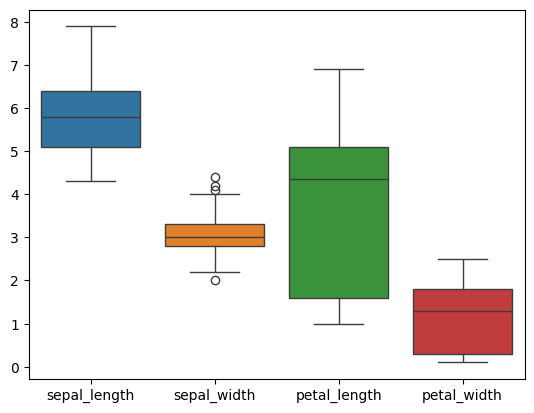

In [261]:
# box plot
sns.boxplot(data=iris)
plt.show()

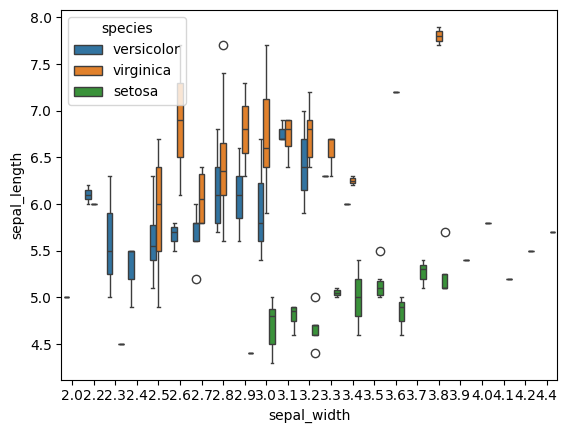

In [216]:
# 숫자 타입 변수(컬럼)들의 box plot
sns.boxplot(data=iris, x='sepal_width', y='sepal_length', hue='species')
plt.show()

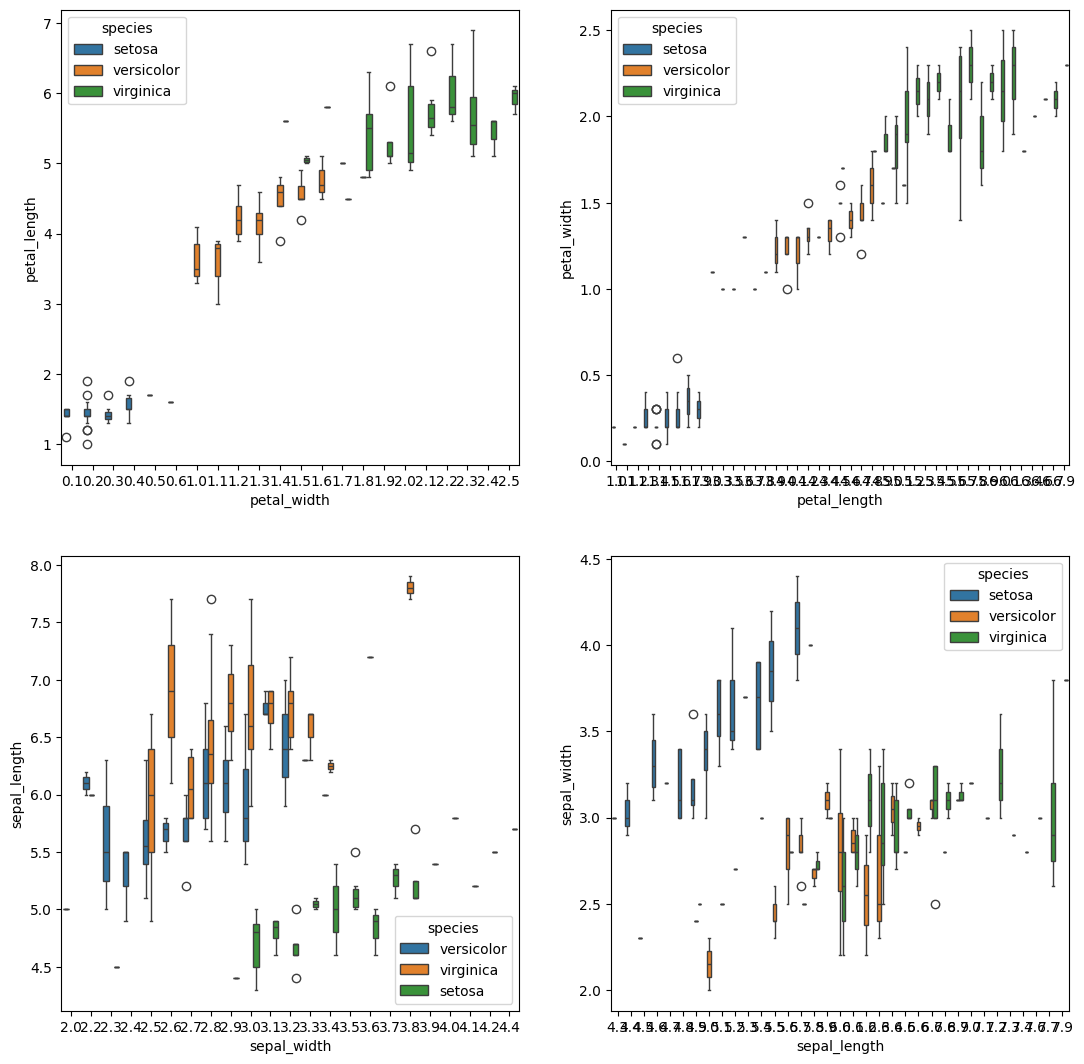

In [217]:
# 숫자 타입 변수(컬럼)들의 box plot

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(13,13))

sns.boxplot(data=iris, x='petal_width', y='petal_length', ax=ax[0,0], hue='species')
sns.boxplot(data=iris, x='petal_length', y='petal_width', ax=ax[0,1], hue='species')
sns.boxplot(data=iris, x='sepal_width', y='sepal_length', ax=ax[1,0], hue='species')
sns.boxplot(data=iris, x='sepal_length', y='sepal_width', ax=ax[1,1], hue='species')

plt.show()

In [245]:
# 숫자 타입 변수(컬럼)들의 box plot
# sns.catplot(data=iris, x='sepal_width', y='sepal_length', row='petal_width', col='petal_length', kind='bar')    # timeout
figure = px.box(data_frame=iris, x='sepal_width', y='sepal_length', color='species')
figure.show()

In [246]:
# 숫자 타입 변수(컬럼)들의 box plot
figure = px.box(data_frame=iris, x='sepal_length', y='sepal_width', color='species')
figure.show()

In [247]:
# 숫자 타입 변수(컬럼)들의 box plot
figure = px.box(data_frame=iris, x='petal_width', y='petal_length', color='species')
figure.show()

In [248]:
# 숫자 타입 변수(컬럼)들의 box plot
figure = px.box(data_frame=iris, x='petal_length', y='petal_width', color='species')
figure.show()

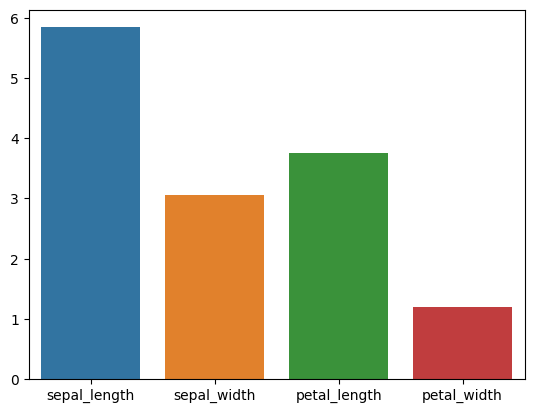

In [263]:
# (mean) bar plot
sns.barplot(data=iris, errorbar=None)
plt.show()

In [270]:
print(iris.columns)
print(iris.columns[:4])   # 첫 4개의 컬럼 이름을 선택
print(iris.columns[:-1])  # 마지막 컬럼을 제외한 나머지 모든 컬럼 이름을 선택

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [271]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
iris[iris.columns[:-1]].mean()

,0
sepal_length,5.843333
sepal_width,3.057333
petal_length,3.758000
petal_width,1.199333


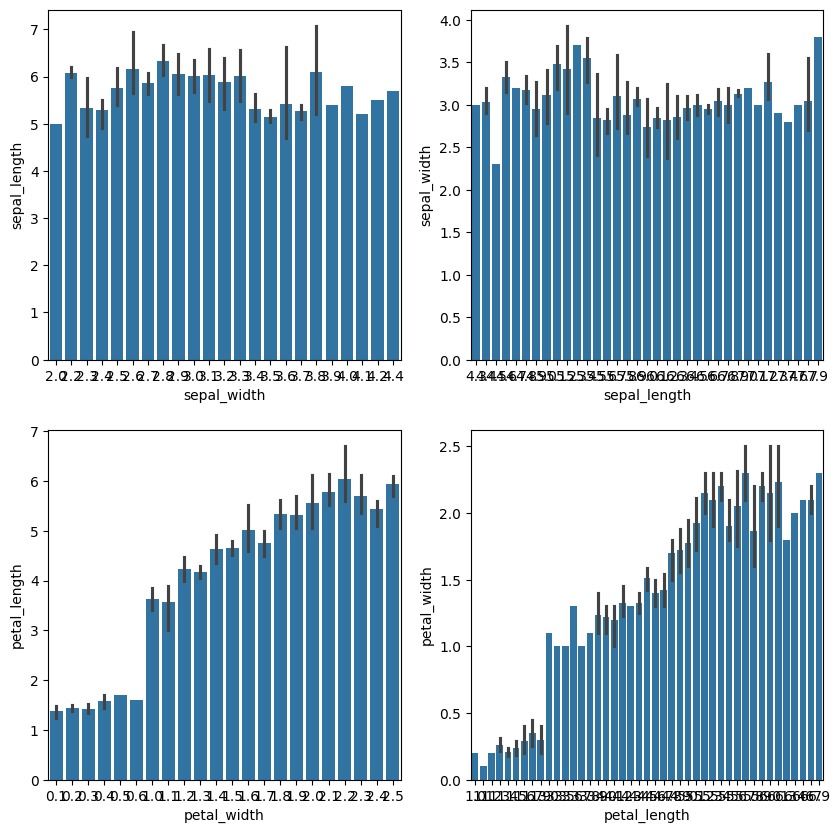

In [219]:
# 숫자 타입 변수(컬럼)들의 평균 막대 그래프
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.barplot(data=iris, x='sepal_width', y='sepal_length', ax=ax[0,0])
sns.barplot(data=iris, x='sepal_length', y='sepal_width', ax=ax[0,1])
sns.barplot(data=iris, x='petal_width', y='petal_length', ax=ax[1,0])
sns.barplot(data=iris, x='petal_length', y='petal_width', ax=ax[1,1])

plt.show()

In [272]:
# 카테고리 변수의 빈도수
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


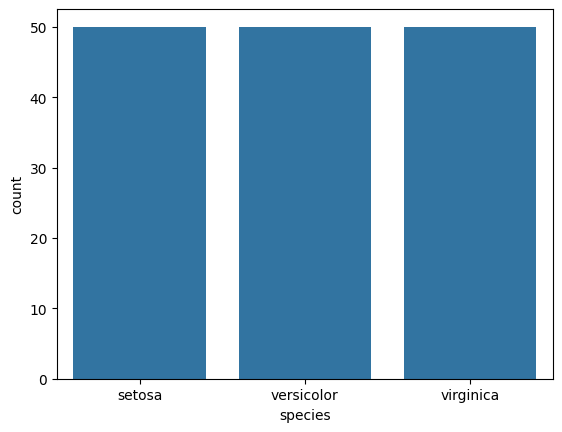

In [274]:
sns.countplot(data=iris, x='species')
plt.show()

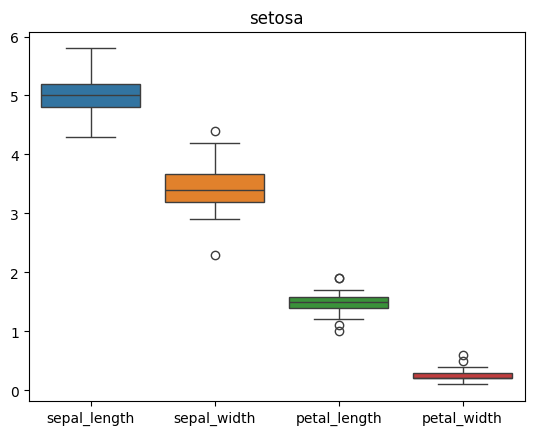

In [275]:
sns.boxplot(data=iris[iris.species == 'setosa'])
plt.title('setosa')
plt.show()

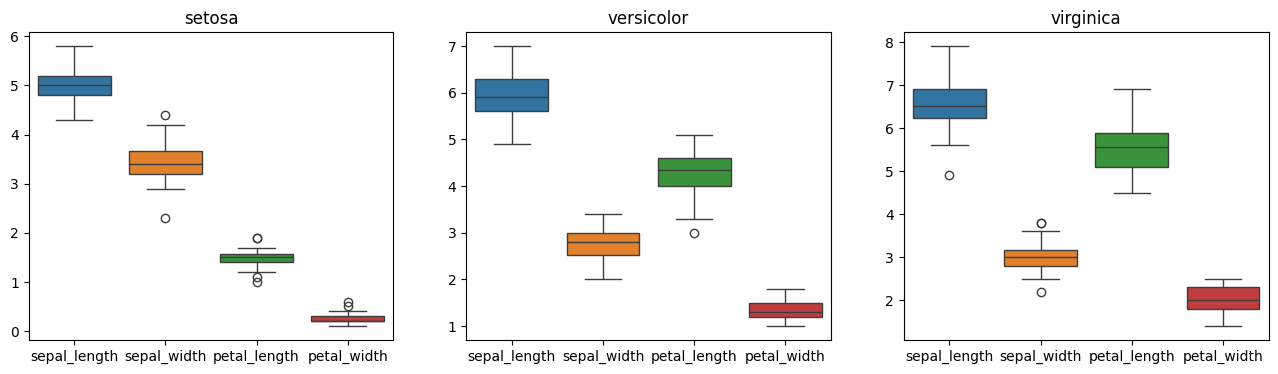

In [277]:
# 품종별 box plot
species = iris.species.unique()

fig, axes = plt.subplots(ncols=len(species), figsize=(16,4))

for i, s in enumerate(species):
  data = iris[iris.species == s]
  sns.boxplot(data=data, ax=axes[i])
  axes[i].set_title(s)

plt.show()

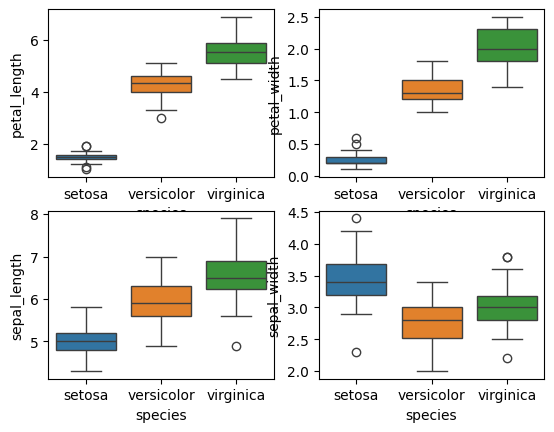

In [220]:
# 품종별 모든 연속형 변수들의 box plot
fig, ax = plt.subplots(ncols=2, nrows=2)

sns.boxplot(data=iris, x='species', y='petal_length', ax=ax[0,0], hue='species')
sns.boxplot(data=iris, x='species', y='petal_width', ax=ax[0,1], hue='species')
sns.boxplot(data=iris, x='species', y='sepal_length', ax=ax[1,0], hue='species')
sns.boxplot(data=iris, x='species', y='sepal_width', ax=ax[1,1], hue='species')

plt.show()

In [252]:
# 품종별 모든 연속형 변수들의 box plot
figure = px.box(data_frame=iris, x='species', y='petal_width')
figure.show()

In [253]:
# 품종별 모든 연속형 변수들의 box plot
figure = px.box(data_frame=iris, x='species', y='petal_length')
figure.show()

In [254]:
# 품종별 모든 연속형 변수들의 box plot
figure = px.box(data_frame=iris, x='species', y='sepal_length')
figure.show()

In [255]:
# 품종별 모든 연속형 변수들의 box plot
figure = px.box(data_frame=iris, x='species', y='sepal_width')
figure.show()

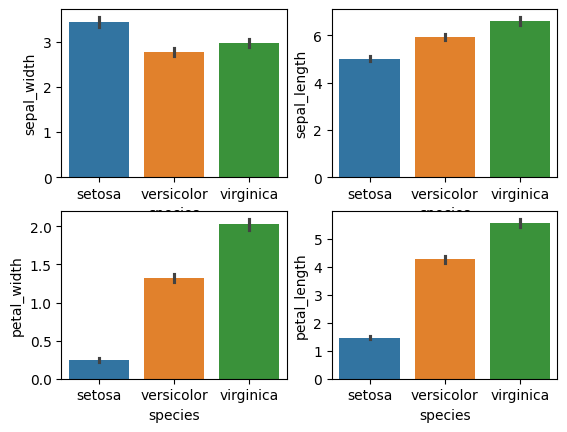

In [280]:
# 품종별 모든 연속형 변수들의 평균 막대 그래프
fig, ax = plt.subplots(nrows=2, ncols=2)

sns.barplot(data=iris, x='species', y='sepal_width', ax=ax[0,0], hue='species')
sns.barplot(data=iris, x='species', y='sepal_length', ax=ax[0,1], hue='species')
sns.barplot(data=iris, x='species', y='petal_width', ax=ax[1,0], hue='species')
sns.barplot(data=iris, x='species', y='petal_length', ax=ax[1,1], hue='species')

plt.show()

In [281]:
iris.groupby(by=['species'])[iris.columns[:-1]].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


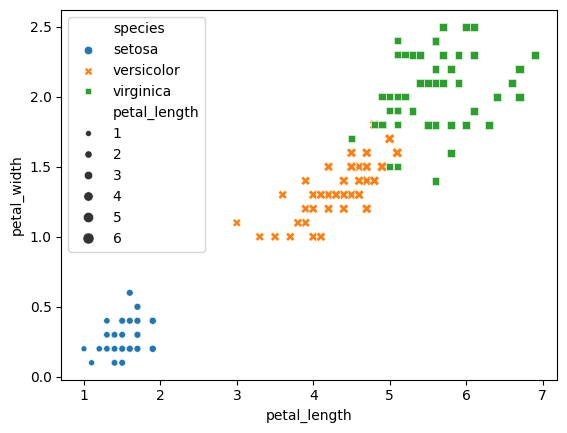

In [222]:
# petal_width ~ petal_length 산점도, 품종별로 색깔을 다르게 시각화.
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species', size='petal_length')

plt.show()

In [259]:
# petal_width ~ petal_length 산점도, 품종별로 색깔을 다르게 시각화.
figure = px.scatter(data_frame=iris, x='petal_length', y='petal_width', color='species')
figure.show()

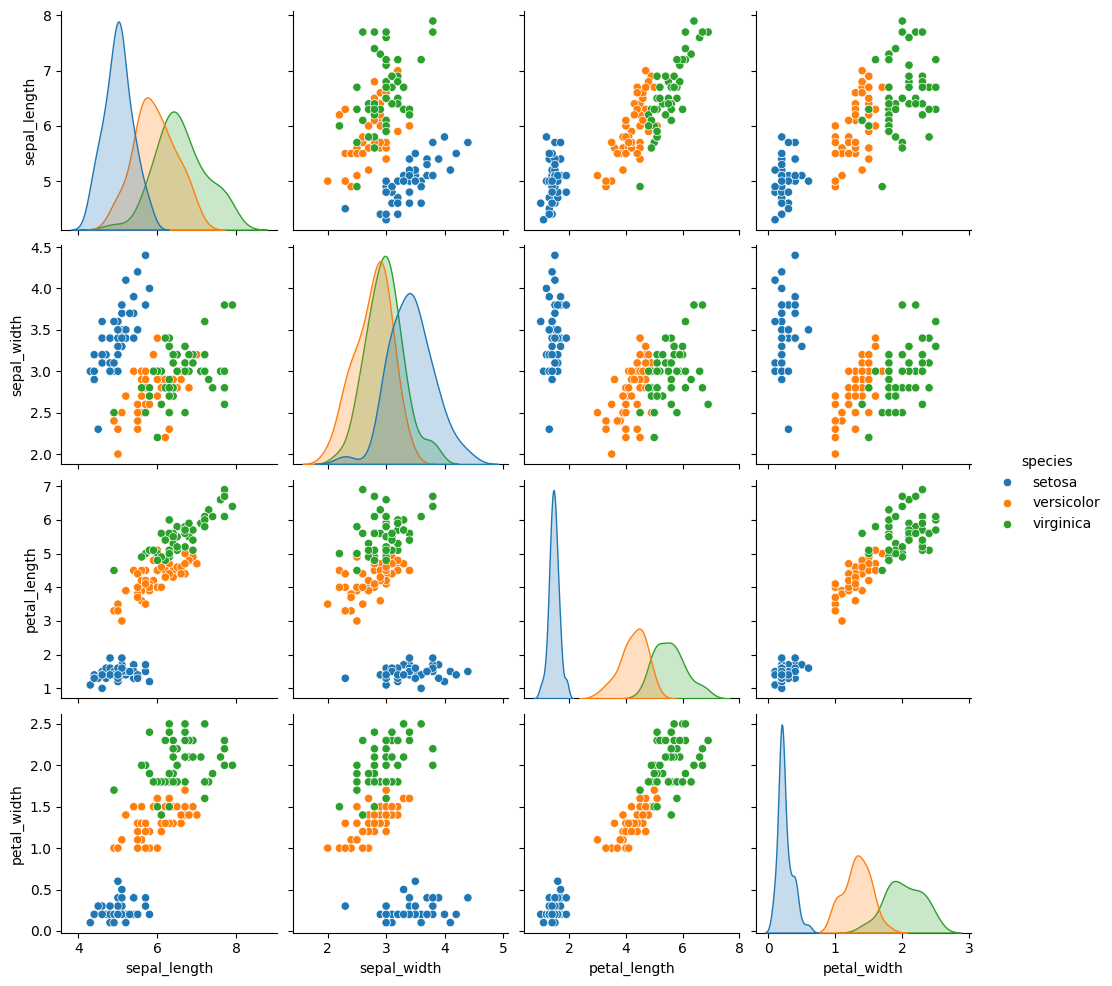

In [282]:
# 모든 연속형 변수들 간의 상관관계(산점도). Hint : pairplot()
sns.pairplot(data=iris, hue='species')

plt.show()

# Ex 2. mpg 데이터셋

*   seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
*   DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
*   산점도
    *   mpg(연비) ~ displacement(배기량)
    *   2x2 모양의 subplot을 생성
        *   mpg ~ cylinders(실린더 개수)
        *   mpg ~ horsepower(마력)
        *   mpg ~ weight(무게)
        *   mpg ~ acceleration(가속도)
*   빈도수 막대 그래프
    *   cyliners 빈도수
    *   origin(자동차 생산 지역) 빈도수
    *   model_year(자동차 생산 연도) 빈도수
        *   선 그래프 가능?
    *   origin 별, cylinders 별 빈도수
*   통계량 막대 그래프 - 2개의 subplot 생성
    *   cylinders 별 mpg의 중앙값(median)
    *   origin 별 mpg의 중앙값

*   Box plot
    *   3개의 subplot을 생성
        *   mpg, displacement, weight box plot
    *   origin 별 mpg box plot
*   Histogram
    *   4개의 subplot을 생성
        *   mpg, displacement, weight, model_year histogram
*   Pair plot

In [224]:
mpg = sns.load_dataset('mpg') # 데이터셋 mpg 로드

In [225]:
mpg.tail()  # 데이터 출력

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [226]:
mpg.info()  # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [227]:
mpg.describe()  # 숫자 타입 기술 통계량

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [228]:
# 카테고리 타입 빈도수
ori = mpg.origin.value_counts()
print(ori)
nam = mpg.name.value_counts()
print(nam)

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64
name
ford pinto             6
ford maverick          5
amc matador            5
toyota corolla         5
amc hornet             4
                      ..
amc concord dl         1
volkswagen rabbit l    1
mazda glc custom l     1
mazda glc custom       1
chevy s-10             1
Name: count, Length: 305, dtype: int64


## 산점도

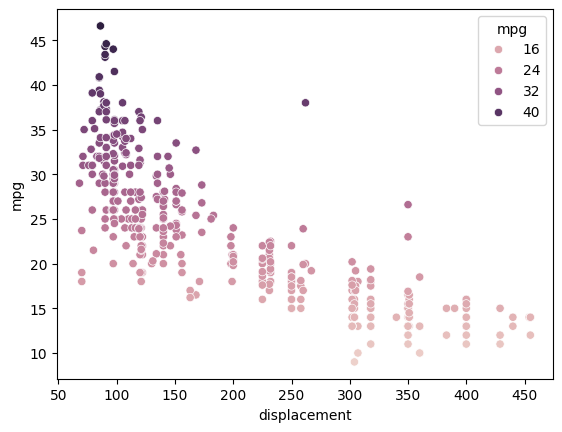

In [229]:
# mpg(연비) ~ displacement(배기량)
sns.scatterplot(data=mpg, x='displacement', y='mpg', hue='mpg')

plt.show()    # 연비가 안 좋을수록 배기량이 많이 배출됨.
              # 연비가 좋을수록 배기량이 적게 배출됨
              # 이는 환경적인 측면에서 소비자의 소비 심리를 자극할 수 있는 요인으로 사용 가능성 有

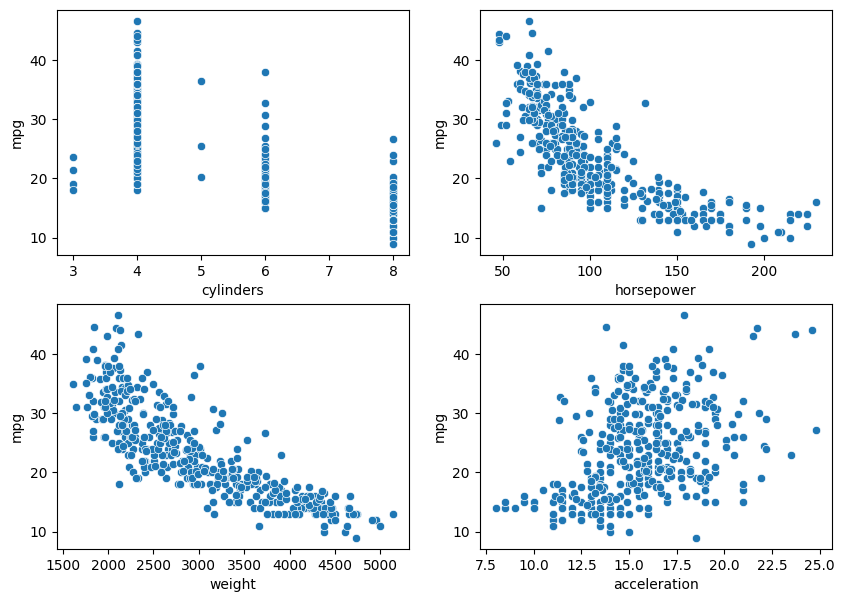

In [230]:
# 2x2 모양의 subplot 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7))

sns.scatterplot(data=mpg, x='cylinders', y='mpg', ax=ax[0,0])
sns.scatterplot(data=mpg, x='horsepower', y='mpg', ax=ax[0,1])
sns.scatterplot(data=mpg, x='weight', y='mpg', ax=ax[1,0])
sns.scatterplot(data=mpg, x='acceleration', y='mpg', ax=ax[1,1])

plt.show()          # 실린더 갯수에 따른 연비의 효율은 긍정적인 결과가 보여지지 않음.
                    # 마력에 따른 연비의 효율은 음의 그래프 형태를 보여줍니다. 마력이 낮을수록 연비가 좋은 경향성을 보입니다.
                    # 무게에 따른 연비의 효울도 음의 그래프 형태로서, 무게가 많이 나갈수록 연비는 안좋아집니다.
                    # 가속에 따른 연비의 효율은 판단하기 애매합니다.

## 빈도수 막대 그래프

In [231]:
  # cylinders 빈도수
  mpg.cylinders.value_counts()    # 4 -> 8 -> 6 -> 3 -> 5 순서로 실린더의 개수가 존재함.

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


In [232]:
# origin(자동차 생산 지역) 빈도수
mpg.origin.value_counts()   # usa, japan, europe 순서로 자동차가 생산되었음.

,count
origin,
usa,249
japan,79
europe,70


In [233]:
# model_year(자동차 생산 연도) 빈도수
mpg.model_year.value_counts()

,count
model_year,
73,40
78,36
76,34
82,31
75,30
80,29
79,29
81,29
70,29


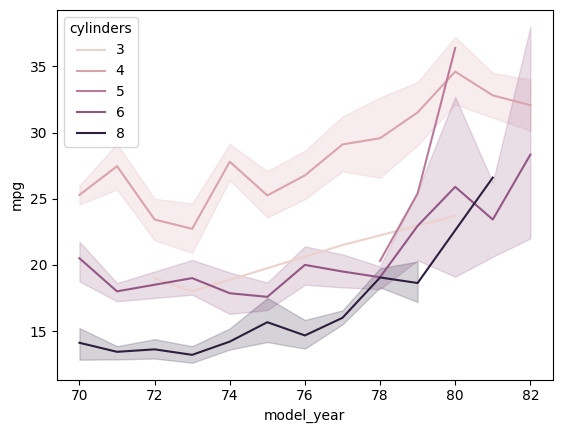

In [234]:
# model_year 선 그래프 생성
sns.lineplot(data=mpg, x='model_year', y='mpg', hue='cylinders')

plt.show()    # 실린더 3,4의 경우 꾸준히 우상향으로 연비가 좋아지고 있음
              # 5와 8의 경우 생산연도가 늦을수록 연비가 좋지 않다가 80년대 들어서면서 연비가 기존 대비 좋아졌음
              # 하지만 이는 3과 비교해봤을 때 부조한 수치임
              # 6의 경우 기하급수적인 연비 상승폭을 보여줌(현재는 단종?)

In [235]:
# origin 별, cylinders 별 빈도수
print(mpg.origin.value_counts())
print(mpg.cylinders.value_counts())

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


## 통계량 막대 그래프 - 2개의 subplot 생성

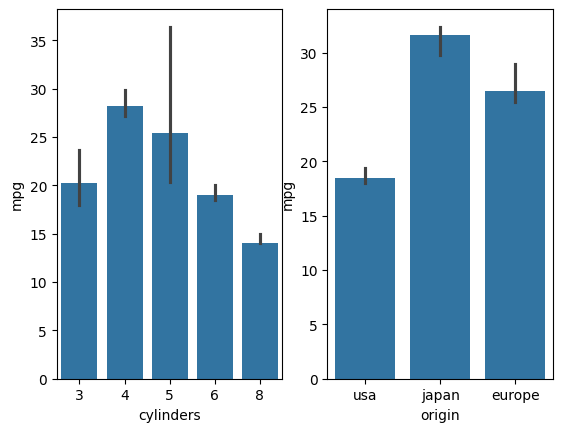

In [236]:
# cylinders 별 mpg의 중앙값(median)
# origin 별 mpg의 중앙값

fig, ax = plt.subplots(ncols=2)

sns.barplot(data=mpg, x='cylinders', y='mpg', estimator='median', ax=ax[0])
sns.barplot(data=mpg, x='origin', y='mpg', estimator='median', ax=ax[1])

plt.show()      # japan에서 만든 차량의 연비가 좋으며, 그중 실린더가 4인 경우가 가장 좋음(중위값 기준)

## Box plot

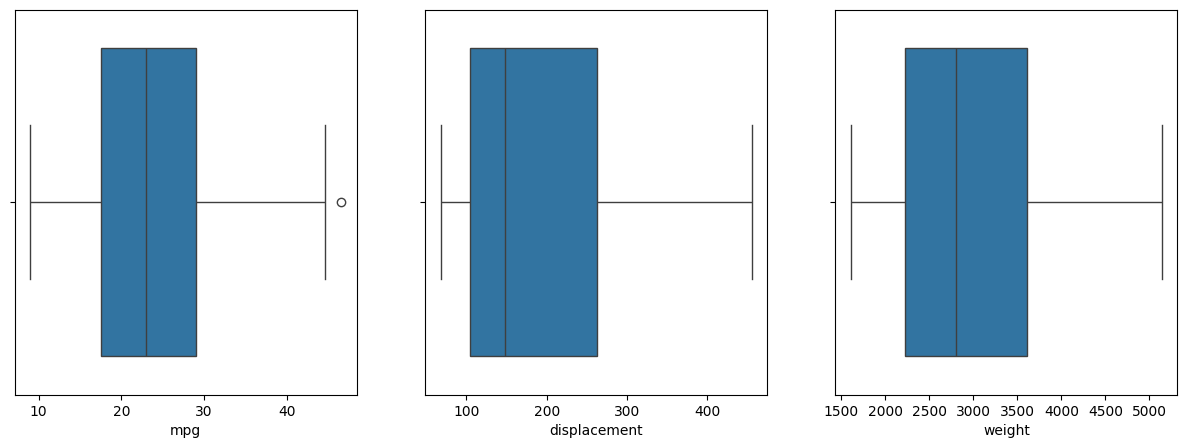

In [237]:
# 3개의 subplot을 생성
# mpg, displacement, weight box plot
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(data=mpg, x='mpg', ax=ax[0])
sns.boxplot(data=mpg, x='displacement', ax=ax[1])
sns.boxplot(data=mpg, x='weight', ax=ax[2])

plt.show()

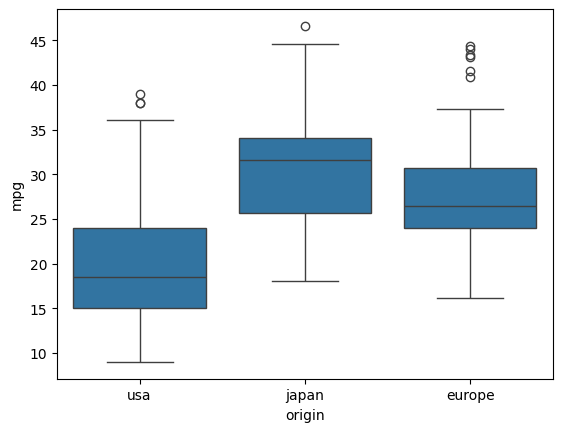

In [238]:
# origin 별 mpg box plot
sns.boxplot(data=mpg, x='origin', y='mpg')

plt.show()

## Histogram

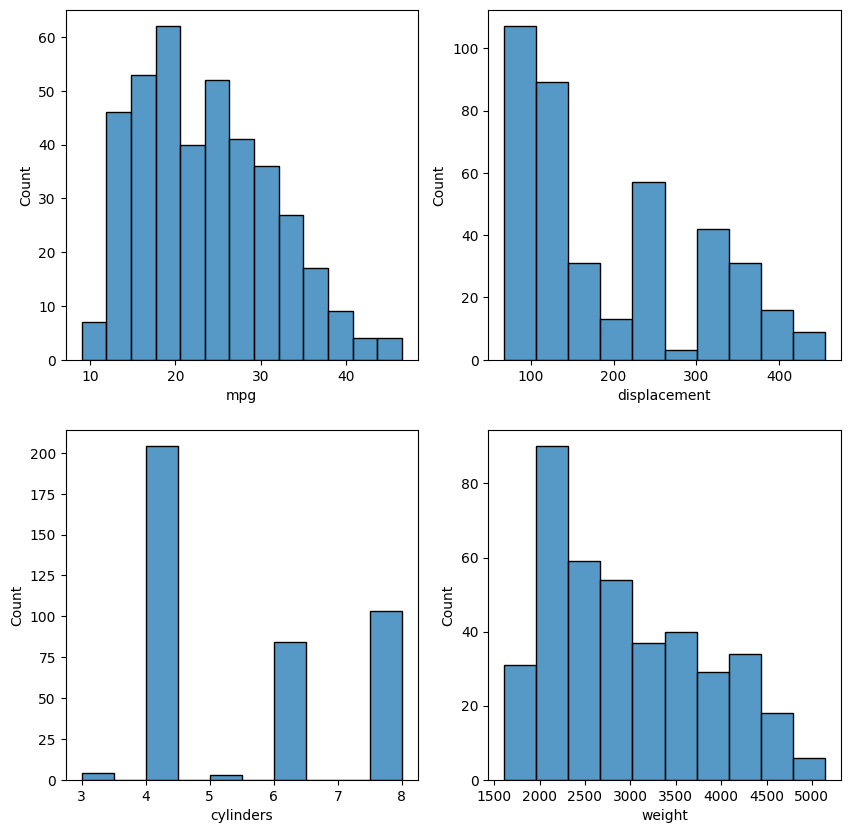

In [239]:
# 4개의 subplot을 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.histplot(data=mpg, x='mpg', ax=ax[0,0])
sns.histplot(data=mpg, x='displacement', ax=ax[0,1])
sns.histplot(data=mpg, x='cylinders', ax=ax[1,0])
sns.histplot(data=mpg, x='weight', ax=ax[1,1])

plt.show()

## Pair plot

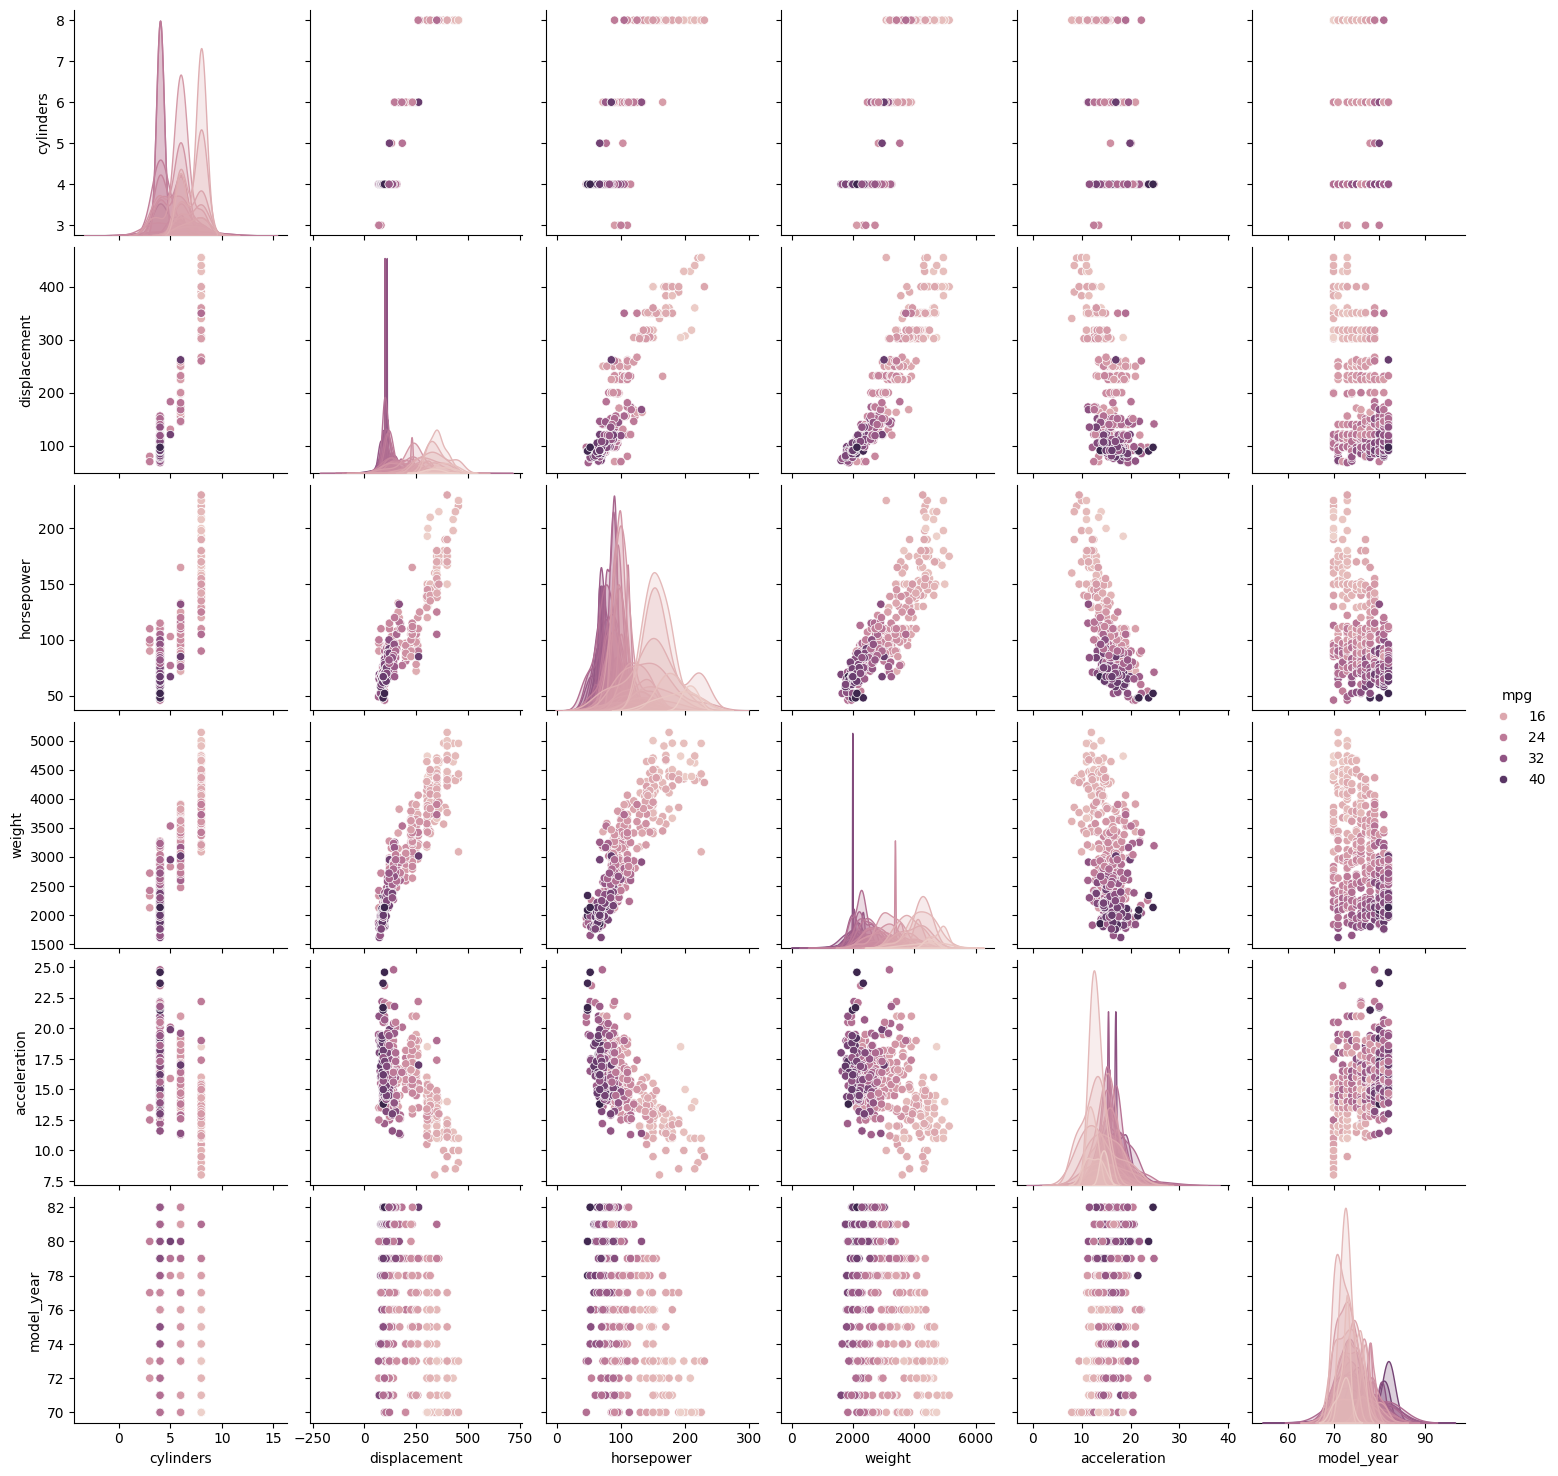

In [240]:
sns.pairplot(data=mpg, hue='mpg')

plt.show()